### K-Means Intuition

* * Takes random guess at where might be the centres of the two clusters.
* * It'll assign cluster centroids and move it .
* * Will check if the point is closer to which centroid . And it will assign the data to the closest one.
* * Recomputes centrod and moves it to the average distance(or mean).
* * Doing it over and over K-menas gets converged.

## K-means Algorithm

* * Randomly initialize K cluster centroids , µ<sub>1</sub> , µ<sub>2</sub> ..., µ<sub>k</sub> , these have same dimension as like training example.

* Repeat:

  { 
    
    ```#assign points to cluster centroids```
     
    for i = 1 to m
    c<sup>i</sup> : = index (from 1 -> k)  of Cluster centroid closest to x<sup>i</sup> min<sub>k</sub> || x <sup>i</sup> - µ<sub>k</sub> || <sup>2</sup>
    
  }
  
  ```#move cluster to centroids```

  for k = 1 -> k
  
  µ<sub>k</sub> = average(mean) of pounts assigned to cluster k
      
  * * We calculate average of horizontal & vertical axis and move k to it. 
  

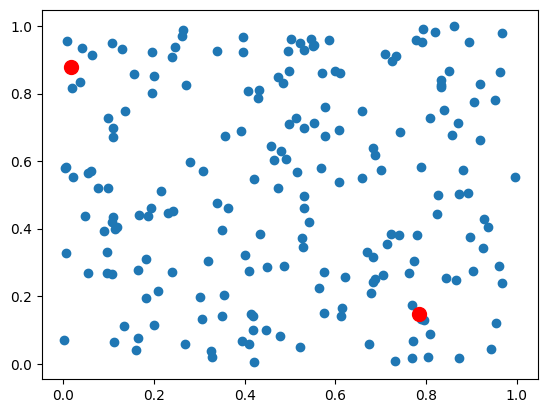

In [9]:
#import stuff
import numpy as np
import matplotlib.pyplot as plt

#assigning the number of clusters
K = 2

#assigning the number of cluster centroids
centroids = np.random.rand(K,2)

#plot the data points and the centroids
plt.scatter(X[:,0],X[:,1])
plt.scatter(centroids[:,0],centroids[:,1],c='r',s=100)
plt.show()


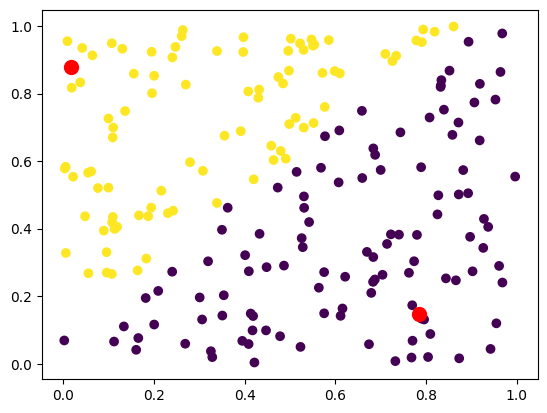

In [10]:
#determine data points to which cluster centroid each point is closest
def closest_centroid(X,centroids):

    #initialize an array to hold the index of the closest centroid for each data point
    closest_centroid = np.zeros(X.shape[0])

    #loop through each data point
    for i in range(X.shape[0]):

        #initialize a variable to hold the minimum distance
        min_dist = 1000000

        #loop through each centroid
        for j in range(centroids.shape[0]):

            #calculate the distance between the data point and the centroid
            dist = np.sqrt((X[i,0] - centroids[j,0])**2 + (X[i,1] - centroids[j,1])**2)

            #if the distance is less than the minimum distance, update the minimum distance and the index of the closest centroid
            if dist < min_dist:
                min_dist = dist
                closest_centroid[i] = j

    #return the array of indices of the closest centroids
    return closest_centroid

#assign each data point to the closest centroid
closest_centroid = closest_centroid(X,centroids)

#plot the data points and the centroids
plt.scatter(X[:,0],X[:,1],c=closest_centroid)
plt.scatter(centroids[:,0],centroids[:,1],c='r',s=100)
plt.show()


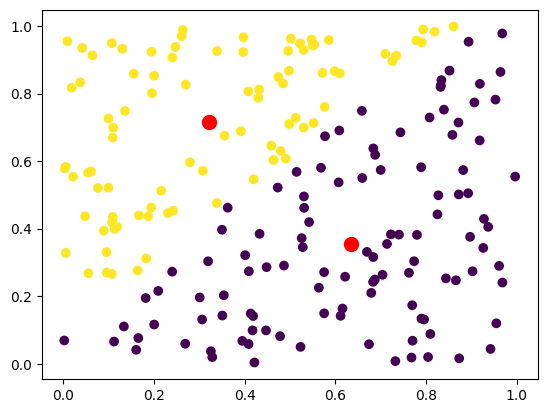

In [11]:
#moving k to the mean of the data points assigned to it
def move_centroids(X,centroids,closest_centroid):
    
        #loop through each centroid
        for i in range(centroids.shape[0]):
    
            #find all data points assigned to the centroid
            assigned_data_points = X[closest_centroid == i]
    
            #move the centroid to the mean of the assigned data points
            centroids[i] = np.mean(assigned_data_points,axis=0)
    
        #return the new centroids
        return centroids

#move the centroids to the mean of the data points assigned to them
centroids = move_centroids(X,centroids,closest_centroid)

#plot the data points and the centroids
plt.scatter(X[:,0],X[:,1],c=closest_centroid)
plt.scatter(centroids[:,0],centroids[:,1],c='r',s=100)
plt.show()
